# Association Rule Mining via Apriori Algorithm in Python
This practical content is modified from https://medium.com/analytics-vidhya/association-analysis-in-python-2b955d0180c by Dr Hong Qing Yu (Harry)

# Association rule mining is a technique to identify underlying relations between different items. 
#In this practical session we will learn how to apply Apriori Algorihtm to do association rule mining
#Apriori is an algorithm for frequent item set mining and association rule learning over relational databases. It proceeds by identifying the frequent individual items in the database and extending them to larger and larger item sets as long as those item sets appear sufficiently often in the database. The frequent item sets determined by Apriori can be used to determine association rules which highlight general trends in the database: this has applications in domains such as market basket analysis.


Python has many libraries for apriori implementation. One can also implement the algorithm from scratch. But wait, there is mlxtend for the rescue. This library has beautiful implementation of apriori and it also allows to extract association rules from the result.

# Let's start

In [4]:
#import useful libraries first
!!pip install mlxtend
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [6]:
#Datais a custom dataset called retail_dataset
df = pd.read_csv('retail_dataset.csv', sep=',') #create a panda dataframe by loading data from csv file
df.head(5)# Print top 5 rows

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN


# data pre-processing
These NaNs make it hard to read the table. Let’s find out how many unique items are actually there in the table.

In [10]:
items = (df['0'].unique())
items

array(['Bread', 'Cheese', 'Meat', 'Eggs', 'Wine', 'Bagel', 'Pencil',
       'Diaper', 'Milk'], dtype=object)

To make use of the apriori module given by mlxtend library, we need to convert the dataset according to it’s liking. apriori module requires a dataframe that has either 0 and 1 or True and False as data. The data we have is all string (name of items), we need to One Hot Encode the data

In [12]:
#Custom One Hot Encoding
itemset = set(items)
encoded_vals = []
for index, row in df.iterrows():
    rowset = set(row) 
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]

ohe_df = pd.DataFrame(encoded_vals)

# Applying Apriori

apriori module from mlxtend library provides fast and efficient apriori implementation.

    apriori(df, min_support=0.5, use_colnames=False, max_len=None, verbose=0, low_memory=False)

Parameters

    df : One-Hot-Encoded DataFrame or DataFrame that has 0 and 1 or True and False as values
    min_support : Floating point value between 0 and 1 that indicates the minimum support required for an itemset to be selected.
    # of observation with item / total observation# of observation with item / total observation
    use_colnames : This allows to preserve column names for itemset making it more readable.
    max_len : Max length of itemset generated. If not set, all possible lengths are evaluated.
    verbose : Shows the number of iterations if >= 1 and low_memory is True. If =1 and low_memory is False , shows the number of combinations.
    low_memory :
    If True, uses an iterator to search for combinations above min_support. Note that while low_memory=True should only be used for large dataset if memory resources are limited, because this implementation is approx. 3–6x slower than the default.

In [13]:
freq_items = apriori(ohe_df, min_support=0.2, use_colnames=True, verbose=1)
freq_items.head(7)

Processing 4 combinations | Sampling itemset size 4


,support,itemsets
0,0.425397,(Bagel)
1,0.504762,(Bread)
2,0.501587,(Cheese)
3,0.406349,(Diaper)
4,0.438095,(Eggs)
5,0.476190,(Meat)
6,0.501587,(Milk)


In [14]:
#A bit of EDA here
import seaborn as sns
%matplotlib inline

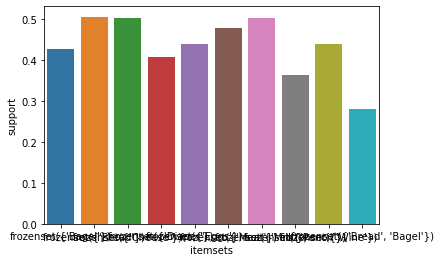

In [27]:
ax = sns.barplot(x='itemsets', y='support', data=freq_items[:10])

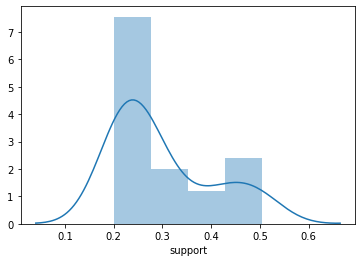

In [28]:
sns.distplot(freq_items['support'])

# Mining Association Rules

association_rules(df, metric=’confidence’, min_threshold=0.8, support_only=False)

Metric can be set to confidence, lift, support, leverage and conviction.

In [29]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bagel),(Bread),0.425397,0.504762,0.279365,0.656716,1.301042,0.064641,1.442650
1,(Eggs),(Cheese),0.438095,0.501587,0.298413,0.681159,1.358008,0.078670,1.563203
2,(Meat),(Cheese),0.476190,0.501587,0.323810,0.680000,1.355696,0.084958,1.557540
3,(Cheese),(Meat),0.501587,0.476190,0.323810,0.645570,1.355696,0.084958,1.477891
4,(Milk),(Cheese),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148


# Result analysis: Visualizing results

#1.Support vs Confidence

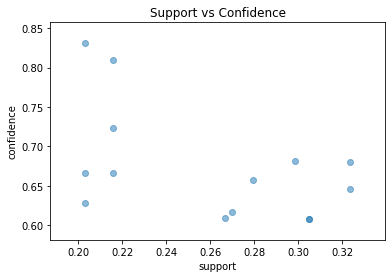

In [30]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

#2. Support vs Lift

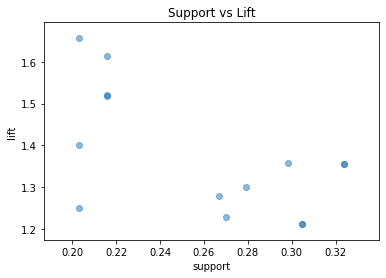

In [32]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

#3 Lift vs Confidence

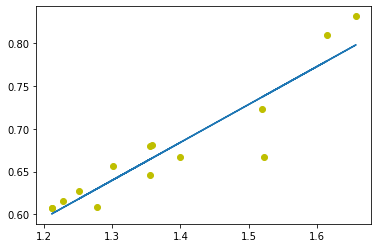

In [34]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'],fit_fn(rules['lift']))

# Correlation analysis

In [ ]:
1
2
	
data1: mean=100.776 stdv=19.620
data2: mean=151.050 stdv=22.358